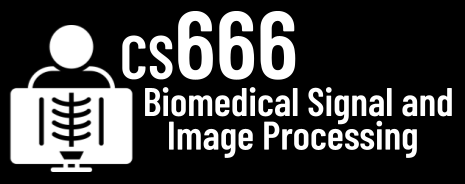
#Assignment 5

In [7]:
# NAME:Poornendu Pabbati

In [8]:
# In this assignment, we will visualize and explore a CT scan!

In [9]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [11]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [12]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [13]:
# TODO: ANS: 220 Slices 

In [14]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [15]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

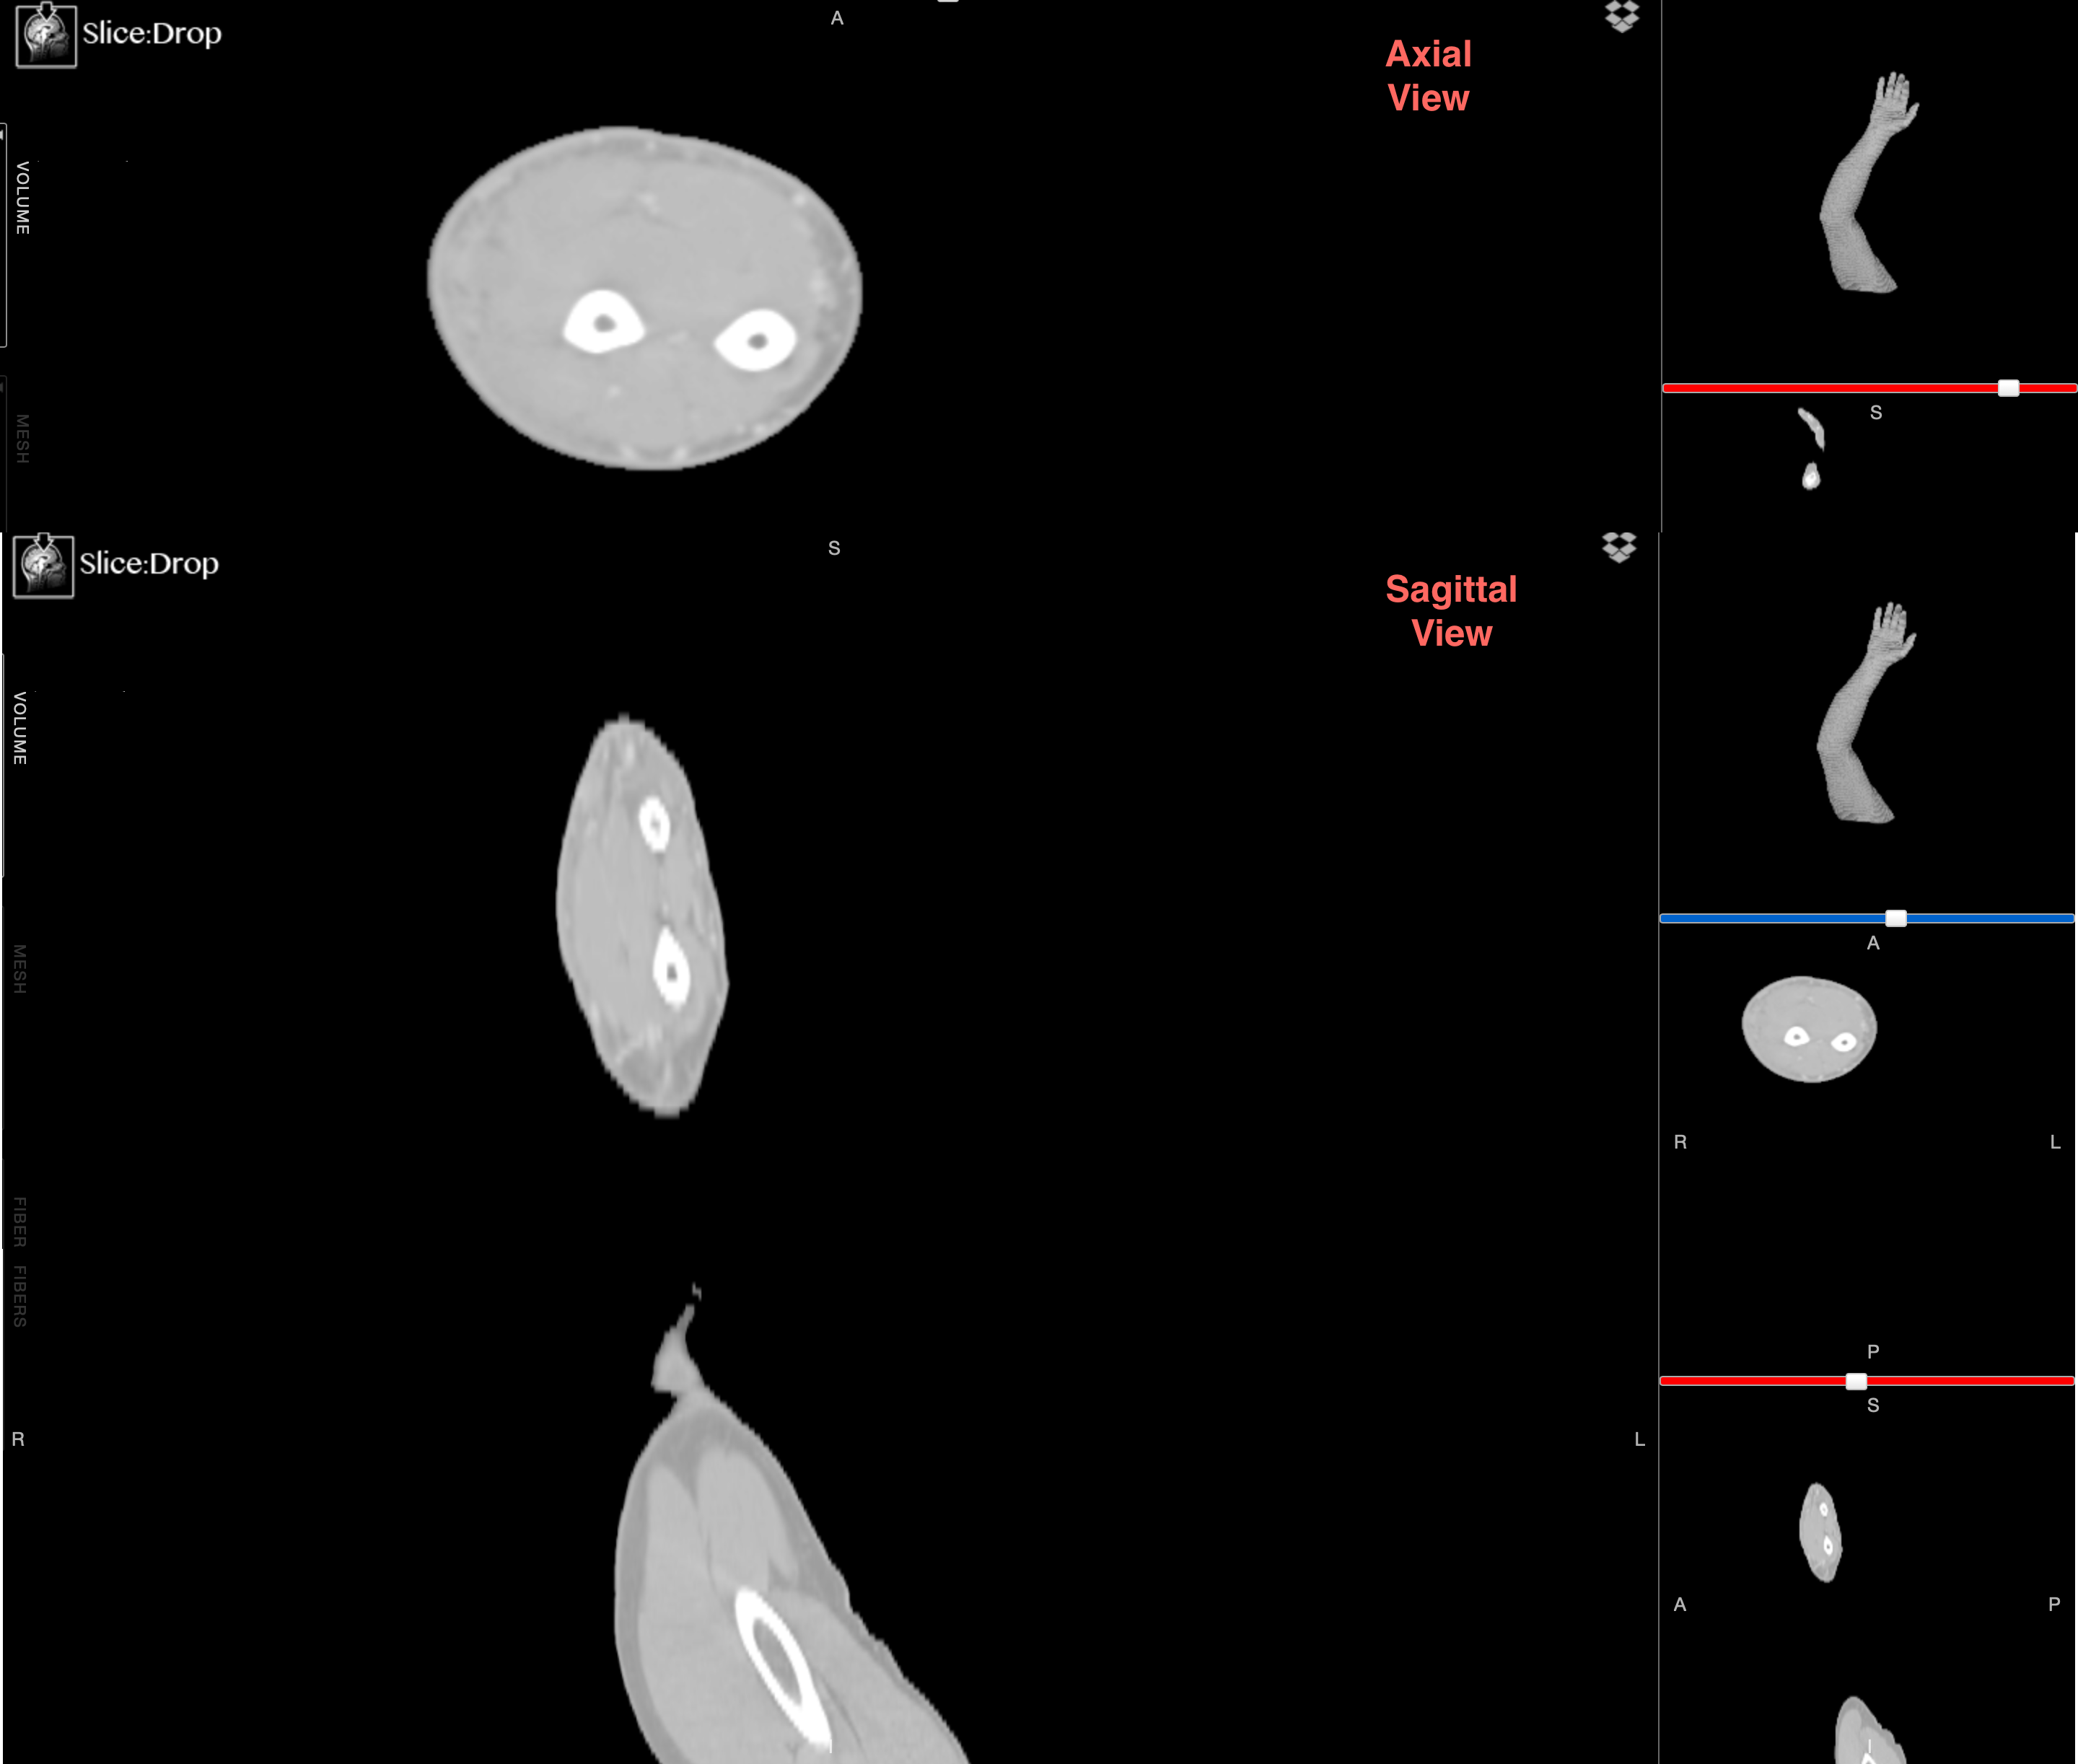

In [16]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [17]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

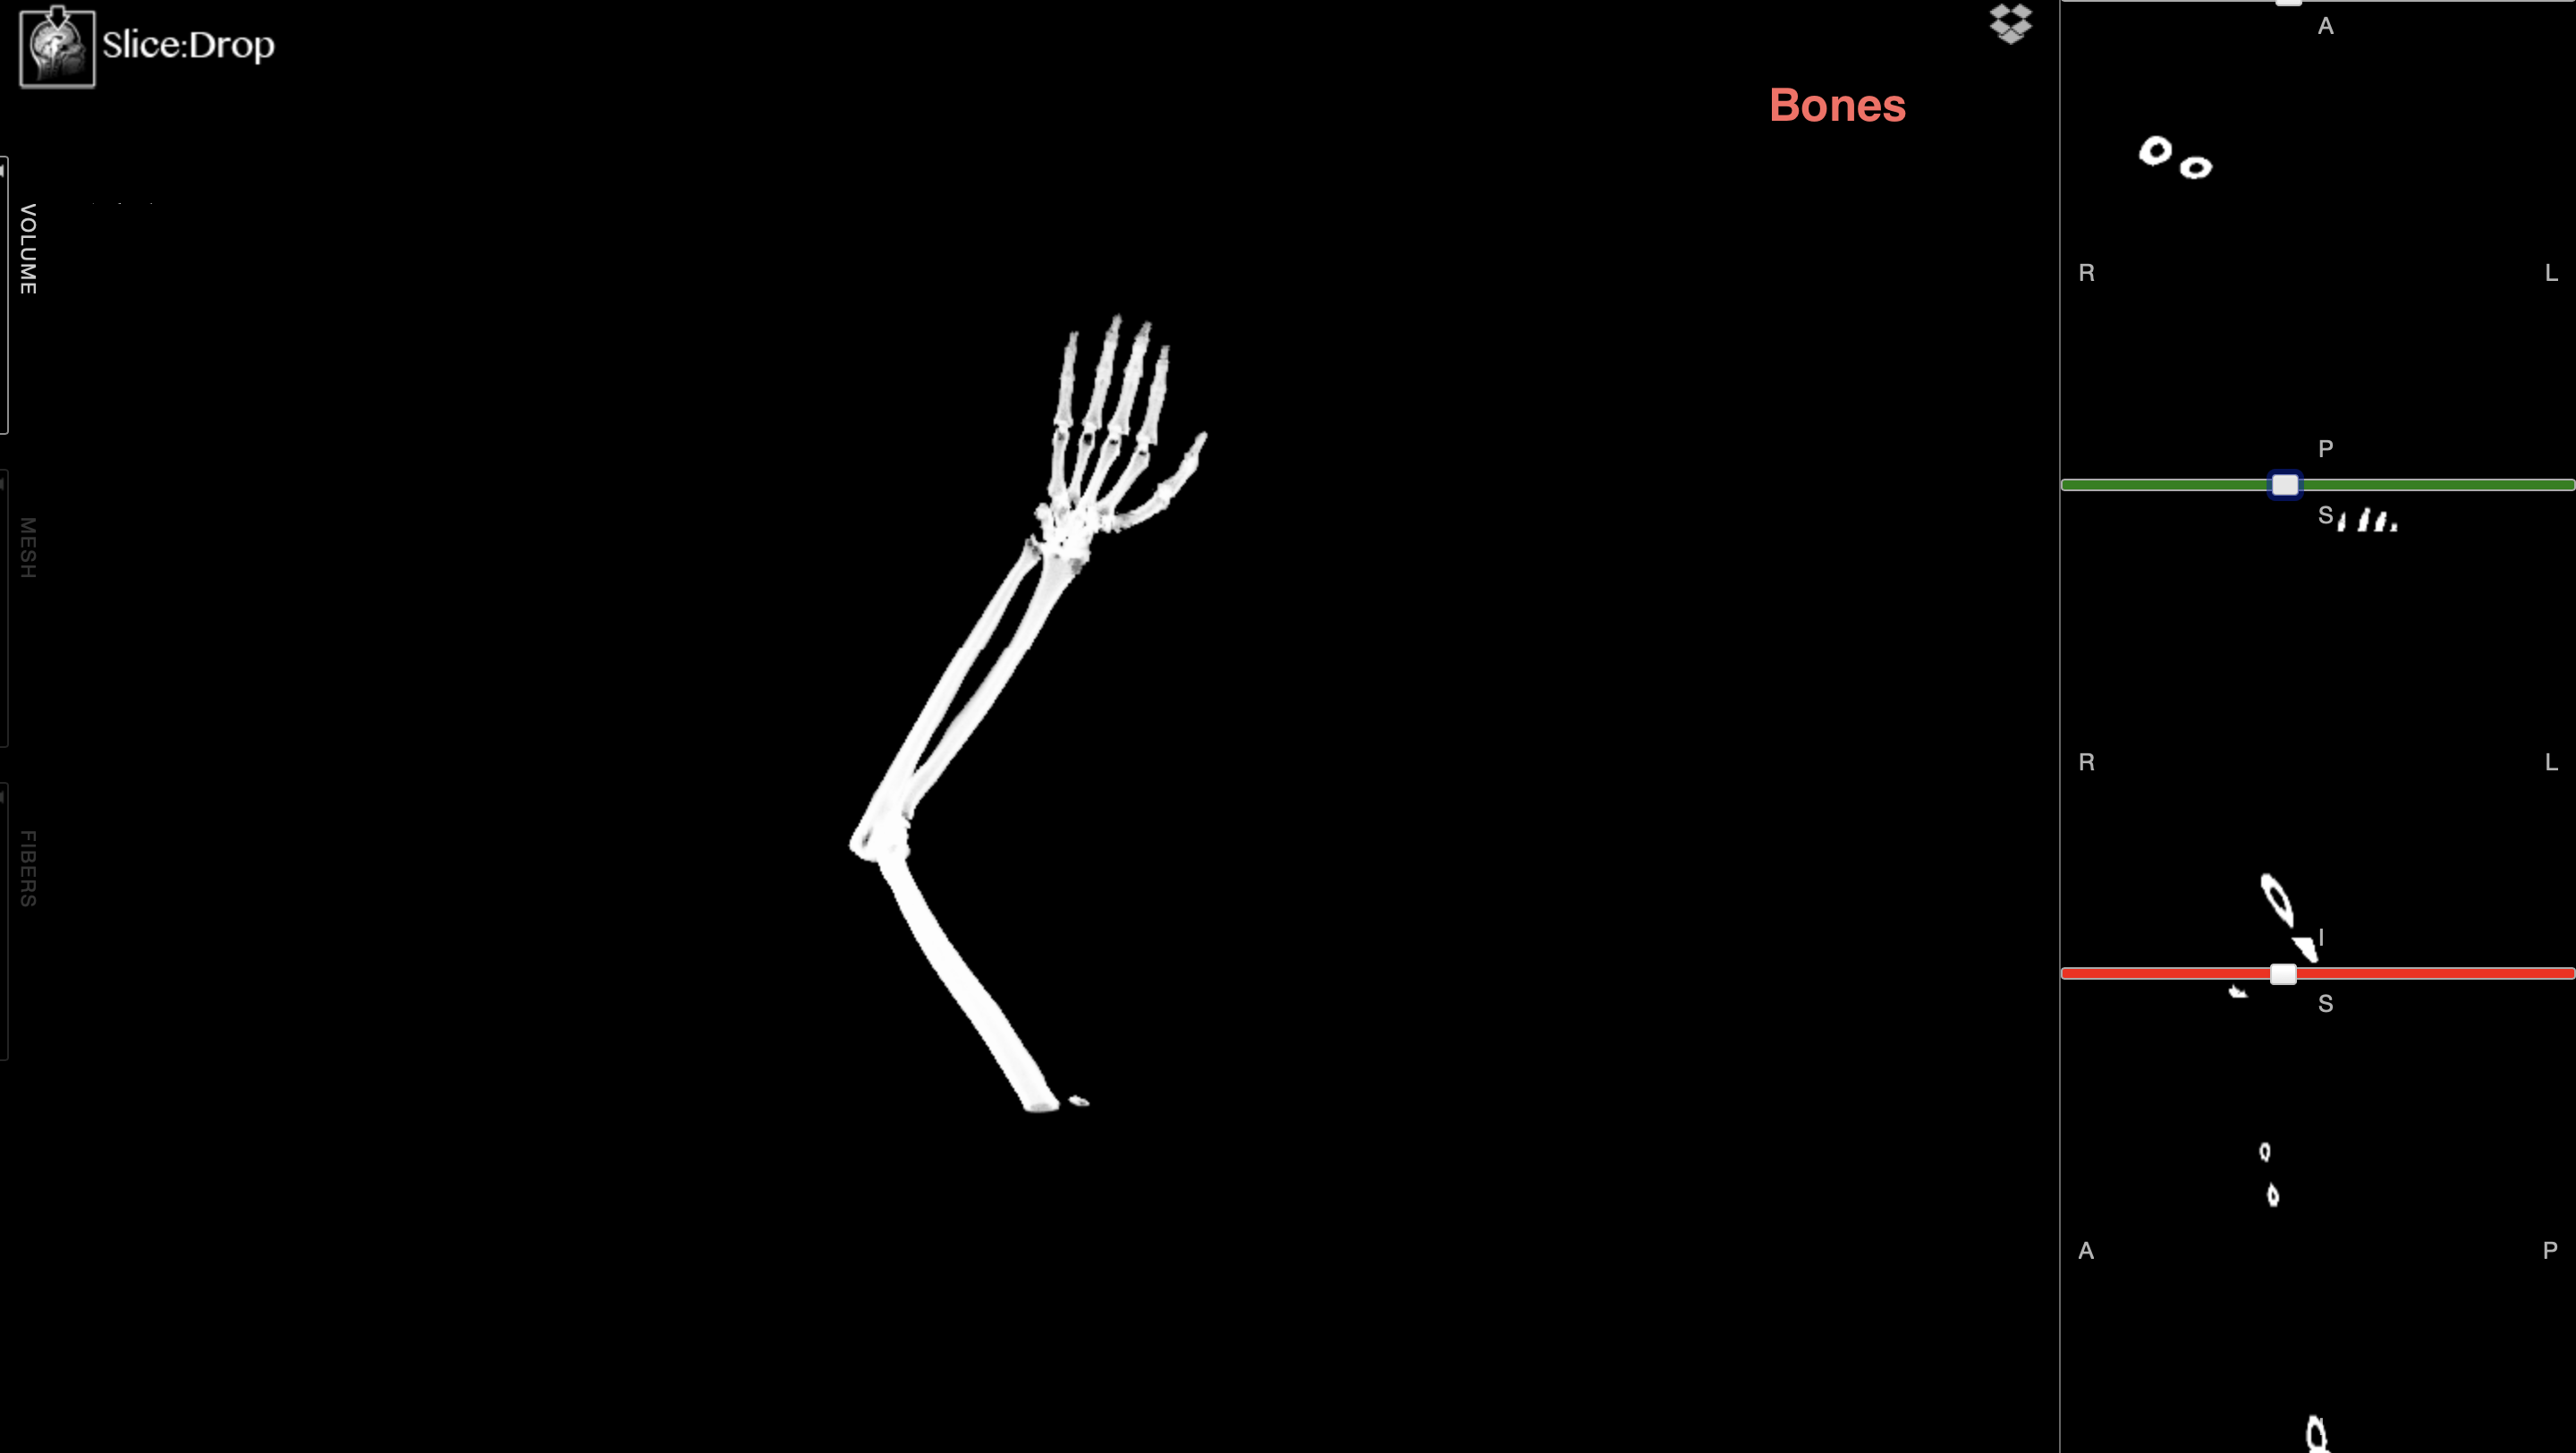

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [18]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [19]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [20]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [21]:
from pydicom import dcmread

In [22]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
import os 
import numpy as np
dir_path = "ct"

# Get a list of all the DICOM files in the directory
files = os.listdir(dir_path)

# Sort the list of files (if necessary)
files.sort()

# Load the first DICOM file to get the dimensions
File = dcmread(os.path.join(dir_path, files[100]))
dims = list(File.pixel_array.shape) + [len(files)]

# Create an empty numpy array to store the pixel data
data = np.zeros(dims, dtype=File.pixel_array.dtype)

# Loop through the files and add the pixel data to the numpy array
for i, file in enumerate(files):
    dicom_file = dcmread(os.path.join(dir_path, file))
    data[:, :, i] = dicom_file.pixel_array


In [23]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

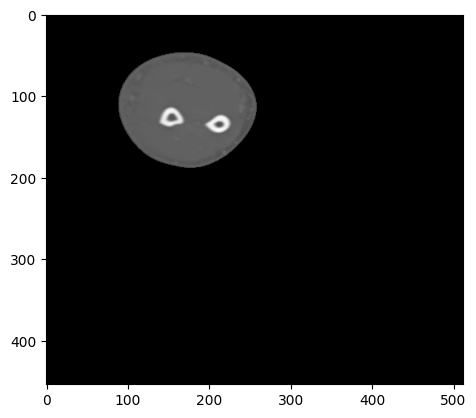

In [24]:
# TODO: YOUR CODE FOR AXIAL
import matplotlib.pyplot as plt
plt.imshow(data[:, :, 100], cmap='gray')
plt.show()

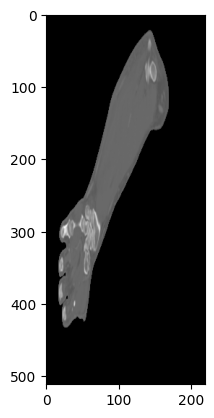

In [25]:
# TODO: YOUR CODE FOR SAGITTAL
plt.imshow(data[100, :, :], cmap='gray')
plt.show()

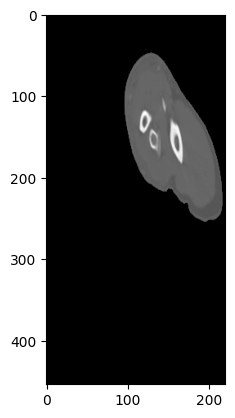

In [26]:
# TODO: YOUR CODE FOR CORONAL
plt.imshow(data[:, 100, :], cmap='gray')
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [27]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [28]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

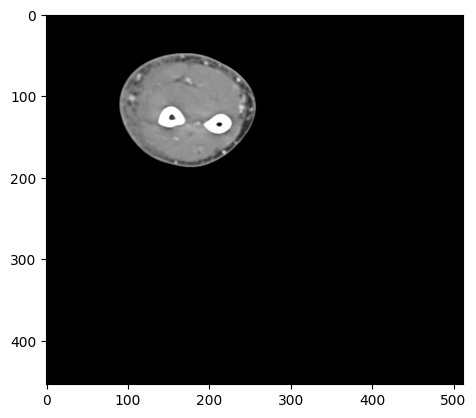

In [29]:
# TODO: YOUR CODE
dir_path = 'ct'

# get a list of all the DICOM files in the directory
files = os.listdir(dir_path)
files.sort()

# read in the first file to get the window/level values
file_path = os.path.join(dir_path, files[100])
File = dcmread(file_path)

# extract the window/level values from the DICOM header
win_center = File[(0x0028, 0x1050)].value
win_width = File[(0x0028, 0x1051)].value
rescale_intercept = File[(0x0028, 0x1052)].value

# read in the image data and apply the rescale intercept
img = dcmread(file_path).pixel_array.astype(np.float32)
img += rescale_intercept

# apply window/level adjustment
vmin = win_center - win_width/2
vmax = win_center + win_width/2
img = np.clip(img, vmin, vmax)

# display the image
plt.imshow(img, cmap='gray')
plt.show()

In [30]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

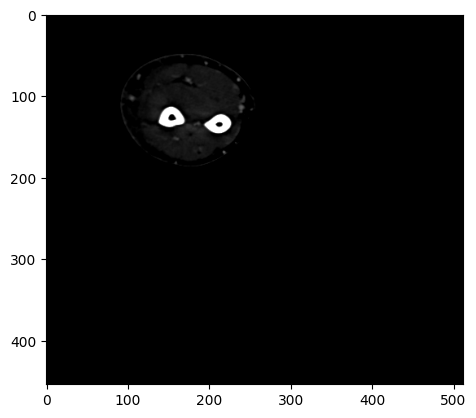

In [31]:
# TODO: YOUR CODE
window_center = File[(0x0028, 0x1050)].value
window_width = File[(0x0028, 0x1051)].value
rescale_intercept = File[(0x0028, 0x1052)].value


# Load DICOM image data
hu_pixels = File.pixel_array.astype(np.int16)

# Adjust window level
window_center_new = window_center + 200  # increase by 200 Hounsfield units
vmin = window_center_new - window_width/2
vmax = window_center_new + window_width/2

# Apply rescale intercept and rescale slope
rescale_slope = File[(0x0028, 0x1053)].value
hu_pixels = hu_pixels * rescale_slope + rescale_intercept

# Apply window/level adjustment
hu_pixels[hu_pixels < vmin] = vmin
hu_pixels[hu_pixels > vmax] = vmax
hu_pixels = (hu_pixels - vmin) / (vmax - vmin) * 255.0
hu_pixels = hu_pixels.astype(np.uint8)

# Display image using matplotlib
import matplotlib.pyplot as plt
plt.imshow(hu_pixels, cmap='gray')
plt.show()

In [32]:
# Which values make sense and why?

In [33]:
# TODO: YOUR ANSWER

In [34]:
## Answer: According to the need for which type of tissue being visualized it is necessary to adjust the window/level values for each individual image to achieve the best possible visualization.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [35]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [36]:
import pydicom

# Load DICOM files into a list
dicom_slices = [pydicom.read_file(os.path.join(dir_path, file)) for file in files]

# Load pixel data into a 3D numpy array
hu_pixels = np.stack([slice.pixel_array for slice in dicom_slices], axis=-1)

# Load window/level values from DICOM header
win_center = dicom_slices[0][0x0028, 0x1050].value
win_width = dicom_slices[0][0x0028, 0x1051].value

# Rescale Hounsfield Units
rescale_intercept = dicom_slices[0][0x0028, 0x1052].value
hu_pixels = hu_pixels * dicom_slices[0].RescaleSlope + rescale_intercept

In [37]:
# TODO: YOUR CODE TO SEGMENT FAT
fat_mask = hu_pixels.copy()
fat_mask[fat_mask < -60] = 0
fat_mask[fat_mask >= -100] = 1


In [38]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
soft_tissue_mask = hu_pixels.copy()
soft_tissue_mask[soft_tissue_mask < 40] = 0
soft_tissue_mask[soft_tissue_mask >= 80] = 0
soft_tissue_mask[soft_tissue_mask != 0] = 1

In [39]:
# TODO: YOUR CODE TO SEGMENT BONES
bone_mask = hu_pixels.copy()
bone_mask[bone_mask < 300] = 0
bone_mask[bone_mask >= 300] = 1

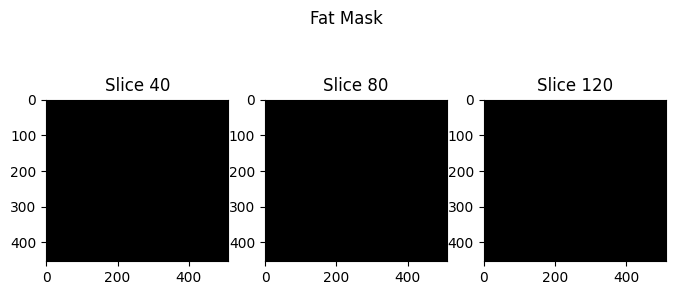

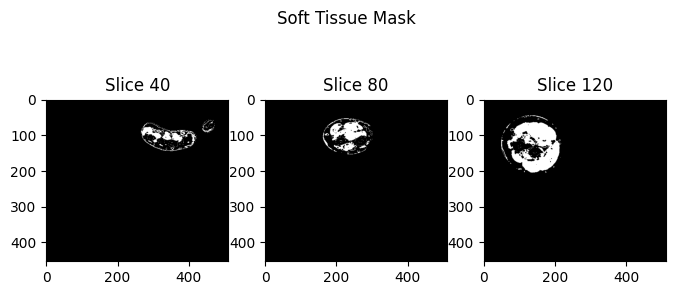

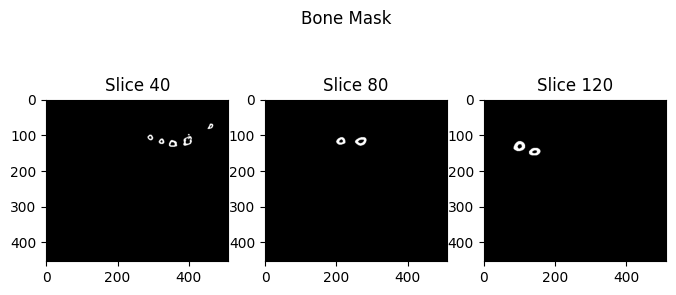

In [40]:
# Are the segmentations good?
slices = [40, 80, 120]  # Choose 3 slices to visualize

# Fat
plt.figure(figsize=(8, 8))
for i, s in enumerate(slices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(fat_mask[:, :, s], cmap="gray")
    plt.title("Slice " + str(s))
plt.suptitle("Fat Mask")
plt.show()
# Soft Tissue
plt.figure(figsize=(8, 8))
for i, s in enumerate(slices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(soft_tissue_mask[:, :, s], cmap="gray")
    plt.title("Slice " + str(s))
plt.suptitle("Soft Tissue Mask")
plt.show()

# Bone
plt.figure(figsize=(8, 8))
for i, s in enumerate(slices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(bone_mask[:, :, s], cmap="gray")
    plt.title("Slice " + str(s))
plt.suptitle("Bone Mask")
plt.show()

In [41]:
# TODO: YOUR ANSWER
# The segmentation for that of Soft tissue and Bones are good but the fat isn't good.

In [42]:
# Resources :  towardsdatascience.com/Dicomsegmentation , StackOverflow and OpenAi
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""